<a href="https://colab.research.google.com/github/ShreyaMandot/Bigdata/blob/main/BigData_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting up PySpark in Colab

In [ ]:
!apt-get install openjdk-8-jdk-headless
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

import findspark
findspark.init()
findspark.find()

import pyspark
import numpy as np
import pandas as pd


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless

**Loading combined.csv file**

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').appName('game').getOrCreate()

# Read data from CSV file
#you can download it from here: https://raw.githubusercontent.com/besherh/BigDataManagement/main/SparkCSV/flights-larger.csv
combined_df = spark.read.csv('./combined-data.csv', sep=',', header=True, inferSchema=True, nullValue='NA')

combined_df.show(5)

+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|
|  1589|         5650|        1|      iphone|              26|         2|       NULL|     NULL|
|  1863|         5651|        1|     android|              35|         4|       NULL|     NULL|
|   937|         5652|        1|     android|              39|         0|          1|     1.00|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
combined_df.printSchema

<bound method DataFrame.printSchema of DataFrame[userId: int, userSessionId: int, teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: string, avg_price: string]>

In [ ]:
combined_df.count()


4619

Removing an uninformative column and

In [ ]:
# Remove the columns
userid_drop_column = combined_df.drop('userId','userSessionId')
#userid_drop_column = combined_df.drop('userSessionId')
userid_drop_column.show(5)


+---------+------------+----------------+----------+-----------+---------+
|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+---------+------------+----------------+----------+-----------+---------+
|        1|     android|              69|         8|       NULL|     NULL|
|        1|      iphone|              31|         5|       NULL|     NULL|
|        1|      iphone|              26|         2|       NULL|     NULL|
|        1|     android|              35|         4|       NULL|     NULL|
|        1|     android|              39|         0|          1|     1.00|
+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



In [ ]:
type(userid_drop_column)

pyspark.sql.dataframe.DataFrame

In [ ]:
from pyspark.sql.types import StringType, BooleanType, IntegerType
course_df3 = userid_drop_column \
  .withColumn("avg_price" ,
              userid_drop_column["avg_price"]
              .cast(IntegerType()))   \
  .withColumn("count_buyId",
              userid_drop_column["count_buyId"]
              .cast(IntegerType()))  
  
#course_df3.printSchema()
course_df3.show(10)

+---------+------------+----------------+----------+-----------+---------+
|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+---------+------------+----------------+----------+-----------+---------+
|        1|     android|              69|         8|       null|     null|
|        1|      iphone|              31|         5|       null|     null|
|        1|      iphone|              26|         2|       null|     null|
|        1|     android|              35|         4|       null|     null|
|        1|     android|              39|         0|          1|        1|
|        1|     android|              36|         5|       null|     null|
|        1|      iphone|              40|         5|       null|     null|
|        1|     windows|              46|         8|       null|     null|
|        1|     android|              68|         6|       null|     null|
|        1|      iphone|              76|         9|       null|     null|
+---------+------------+-

Total number of records

In [ ]:
course_df3.count()

4619

+------------+-----+
|platformType|count|
+------------+-----+
|      iphone| 1934|
|     android| 1635|
|       linux|  252|
|         mac|  179|
|     windows|  619|
+------------+-----+



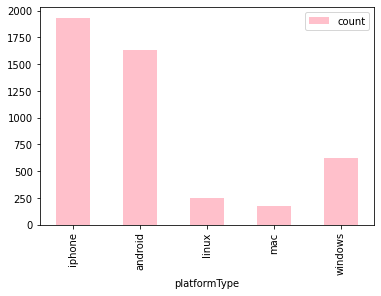

In [ ]:
import pyspark.sql.functions as f
df2 = course_df3.groupBy("platformType").count().select('platformType', f.col('count'))
df2.show()
df2.toPandas().plot.bar(x='platformType', y='count',color='pink')

In [ ]:
type(course_df3)

pyspark.sql.dataframe.DataFrame

Removing Null values

In [ ]:
Combined_valid_avg = course_df3.filter('avg_price IS NOT NULL')
Combined_valid_avg.show(5)


+---------+------------+----------------+----------+-----------+---------+
|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+---------+------------+----------------+----------+-----------+---------+
|        1|     android|              39|         0|          1|        1|
|        1|      iphone|             129|         9|          1|       10|
|        1|     android|             102|        14|          1|        5|
|        1|     android|              39|         4|          1|        3|
|        1|     android|              90|        10|          1|        3|
+---------+------------+----------------+----------+-----------+---------+
only showing top 5 rows



Total number of records after cleaning dataframe

In [ ]:
Combined_valid_avg.count()

1411

Creating label on avg_price

In [ ]:
# Create 'label' column indicating whether buyer is high-roller (1) or not(0)
Combined_valid_avg = Combined_valid_avg.withColumn('label', (Combined_valid_avg.avg_price >= 10).cast('integer'))

# Check first five records
Combined_valid_avg.show(5)

+---------+------------+----------------+----------+-----------+---------+-----+
|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|label|
+---------+------------+----------------+----------+-----------+---------+-----+
|        1|     android|              39|         0|          1|        1|    0|
|        1|      iphone|             129|         9|          1|       10|    1|
|        1|     android|             102|        14|          1|        5|    0|
|        1|     android|              39|         4|          1|        3|    0|
|        1|     android|              90|        10|          1|        3|    0|
+---------+------------+----------------+----------+-----------+---------+-----+
only showing top 5 rows



### Categorical columns
In the Combined data there is coulumn 'platformType', which hold categorical data. We need to transform those column into indexed numerical values.


In [ ]:
from pyspark.ml.feature import StringIndexer

# Create an indexer
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_idx')

# Indexer identifies categories in the data
indexer_model = indexer.fit(Combined_valid_avg)

# Indexer creates a new column with numeric index values
combined_indexed = indexer_model.transform(Combined_valid_avg)

combined_indexed.show(5)

+---------+------------+----------------+----------+-----------+---------+-----+----------------+
|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|label|platformType_idx|
+---------+------------+----------------+----------+-----------+---------+-----+----------------+
|        1|     android|              39|         0|          1|        1|    0|             1.0|
|        1|      iphone|             129|         9|          1|       10|    1|             0.0|
|        1|     android|             102|        14|          1|        5|    0|             1.0|
|        1|     android|              39|         4|          1|        3|    0|             1.0|
|        1|     android|              90|        10|          1|        3|    0|             1.0|
+---------+------------+----------------+----------+-----------+---------+-----+----------------+
only showing top 5 rows



In [ ]:
Combined_valid_avg.printSchema

<bound method DataFrame.printSchema of DataFrame[teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: int, avg_price: int, label: int]>

### Assembling columns
The final stage of data preparation is to consolidate all of the predictor columns into a single column.

At present our data has the following predictor columns:

- `teamLevel`, `count_gameclicks`, `count_hits` and 'count_buyId'
- `platformType_idx` (derived from `platformType`)

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
#assembler = VectorAssembler(inputCols=[
 #   'teamLevel', 'count_gameclicks', 'count_hits',
  #  'count_buyId','platformType_idx'
    
#], outputCol='features')

assembler = VectorAssembler(inputCols=[
    'count_gameclicks', 'count_hits',
    'count_buyId','platformType_idx'
    
], outputCol='features')

# Consolidate predictor columns
combined_assembled = assembler.transform(combined_indexed)

# Check the resulting column
combined_assembled.select('features', 'avg_price').show(10, truncate=False)

+--------------------+---------+
|features            |avg_price|
+--------------------+---------+
|[39.0,0.0,1.0,1.0]  |1        |
|[129.0,9.0,1.0,0.0] |10       |
|[102.0,14.0,1.0,1.0]|5        |
|[39.0,4.0,1.0,1.0]  |3        |
|[90.0,10.0,1.0,1.0] |3        |
|[51.0,8.0,1.0,0.0]  |20       |
|[51.0,6.0,2.0,1.0]  |2        |
|[47.0,5.0,2.0,1.0]  |2        |
|[46.0,7.0,1.0,1.0]  |1        |
|[41.0,6.0,1.0,0.0]  |20       |
+--------------------+---------+
only showing top 10 rows



In [ ]:
combined_assembled.printSchema

<bound method DataFrame.printSchema of DataFrame[teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: int, avg_price: int, label: int, platformType_idx: double, features: vector]>

### Train/test split
To objectively assess a Machine Learning model we need to be able to test it on an independent set of data. We can't use the same data that you used to train the model: of course the model will perform (relatively) well on those data!

we will split the data into two components:

- training data (used to train the model) and
- testing data (used to test the model).

In [ ]:
# Split into training and test sets in a 70:30 ratio
combined_train, combined_test = combined_assembled.randomSplit([0.7, 0.3], seed=17)

# Check that training set has around 70% of records
training_ratio = combined_train.count() / combined_assembled.count()
print(training_ratio)

0.6931254429482636


### Build a Decision Tree
Now that we've split the flights data into training and testing sets, we can use the training set to fit a Decision Tree model.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier()
tree_model = tree.fit(combined_train)

# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(combined_test)
prediction.select('label', 'prediction', 'probability').show(11, False)

+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|0    |0.0       |[0.8894601542416453,0.11053984575835475]|
|1    |1.0       |[0.18658892128279883,0.8134110787172012]|
+-----+----------+----------------------------------------+
only showing top 11 rows



In [ ]:
prediction.count()

433

### Evaluate the Decision Tree

A confusion matrix gives a useful breakdown of predictions versus known values. It has four cells which represent the counts of:

- True Negatives (TN) — model predicts negative outcome & known outcome is negative
- True Positives (TP) — model predicts positive outcome & known outcome is positive
- False Negatives (FN) — model predicts negative outcome but known outcome is positive
- False Positives (FP) — model predicts positive outcome but known outcome is negative.

In [ ]:
# Create a confusion matrix
confusionMatrix= prediction.groupBy('label', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND label = prediction').count()
#print('TN=', TN)
TP = prediction.filter('prediction = 1 AND label = prediction').count()
#print('TP=', TP)
FN = prediction.filter('prediction = 0 AND label = 1').count()
#print('FN=', FN)
FP = prediction.filter('prediction = 1 AND label = 0').count()
#print('FP=', FP)

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("Accuracy=",accuracy)


# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('Precision = {:.2f}\nRecall   = {:.2f}'.format(precision, recall))

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   19|
|    0|       0.0|  245|
|    1|       1.0|  122|
|    0|       1.0|   47|
+-----+----------+-----+

Accuracy= 0.8475750577367206
Precision = 0.72
Recall   = 0.87


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_temp = prediction.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()

class_temp

[0, 1]

Confusion matrix, without normalization
[[245  47]
 [ 19 122]]


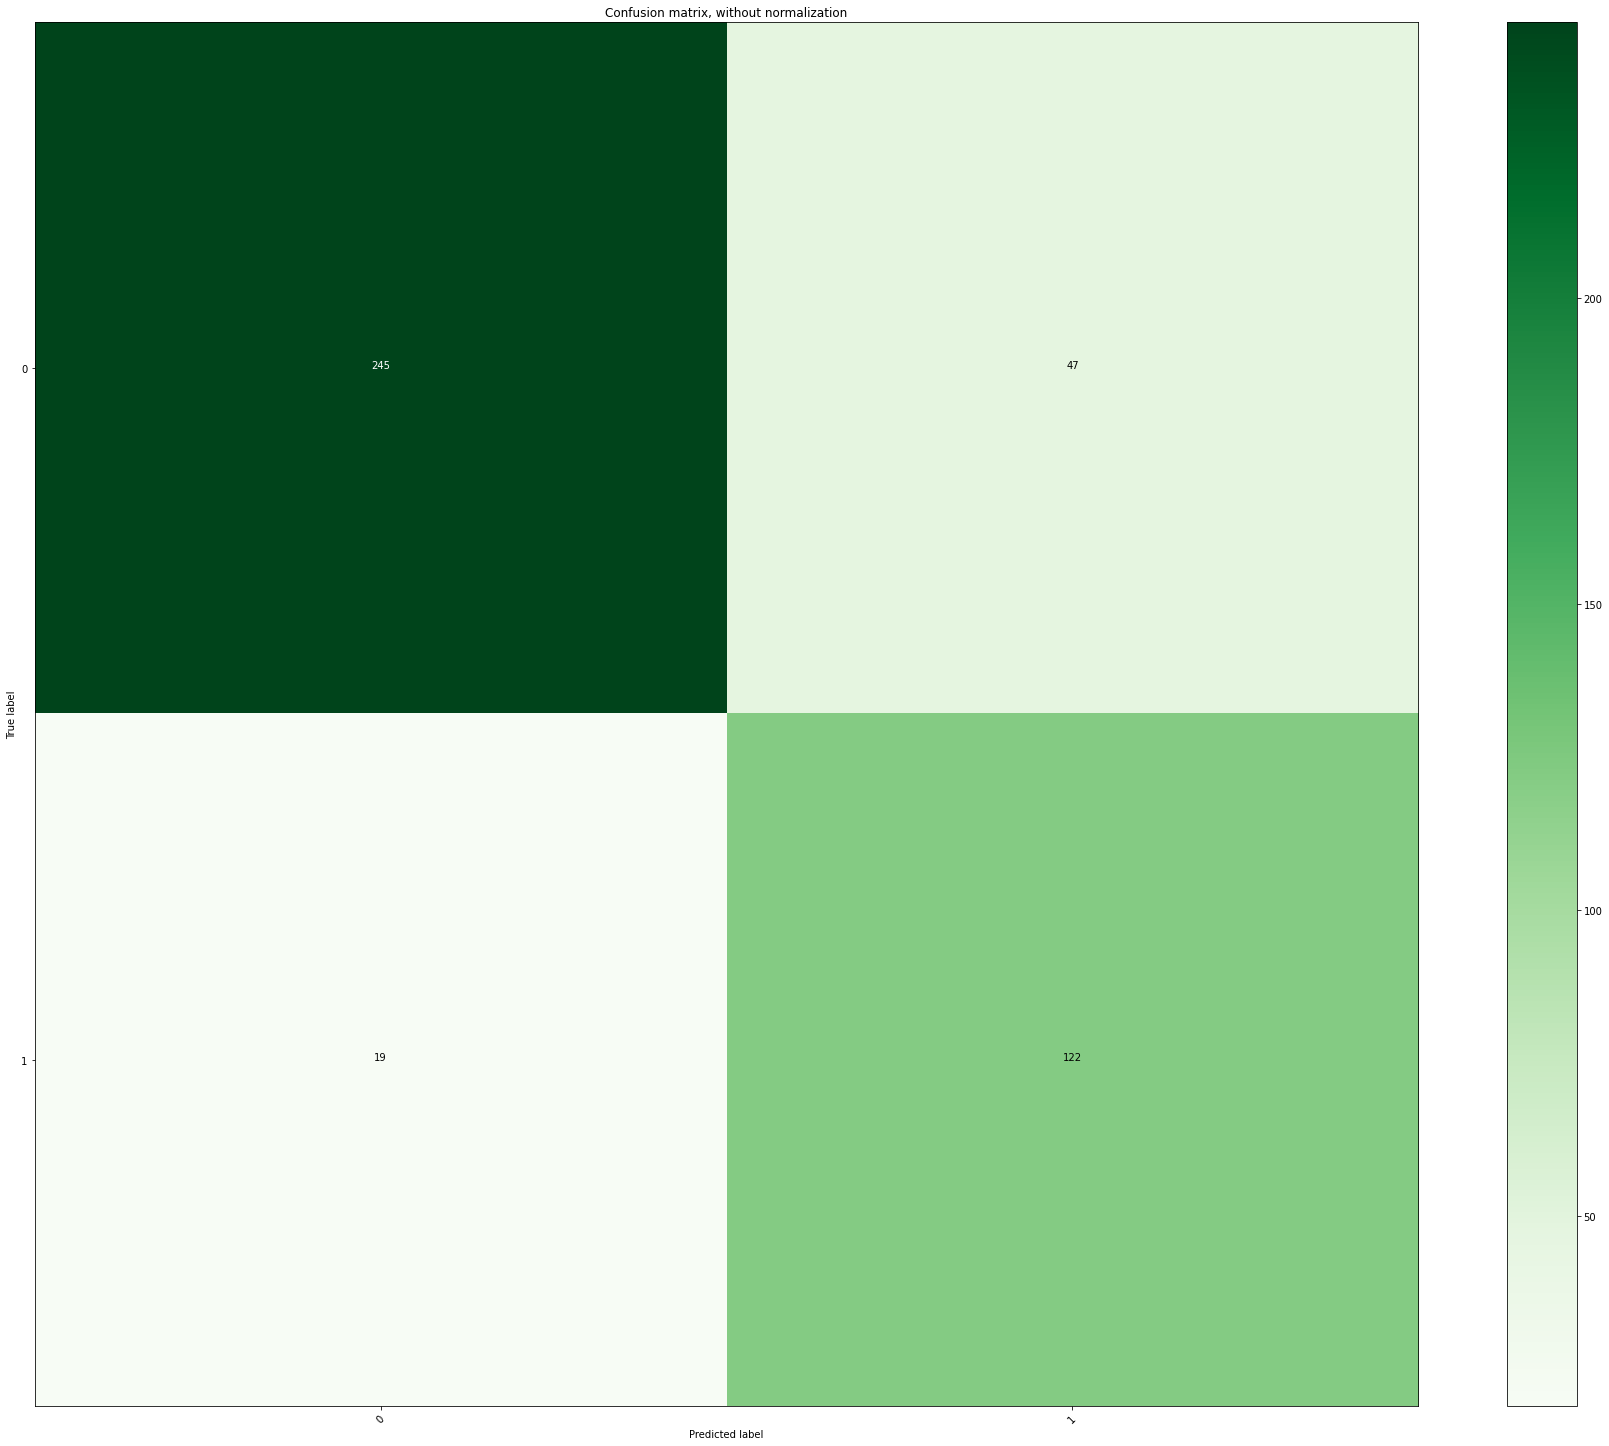

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = prediction.select("label")
y_true = y_true.toPandas()

y_pred = prediction.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_temp)
cnf_matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp,
                      title='Confusion matrix, without normalization')
plt.show()


#Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

logistic = LogisticRegression().fit(combined_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(combined_test)
prediction.groupBy("label", "prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|   19|
|    0|       0.0|  244|
|    1|       1.0|  122|
|    0|       1.0|   48|
+-----+----------+-----+



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(prediction)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.154734


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
class_temp = prediction.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()

class_temp

[0, 1]

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = prediction.select("label")
y_true = y_true.toPandas()

y_pred = prediction.select("prediction")
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred,labels=class_temp)
cnf_matrix

array([[245,  47],
       [ 19, 122]])

Confusion matrix, without normalization
[[245  47]
 [ 19 122]]


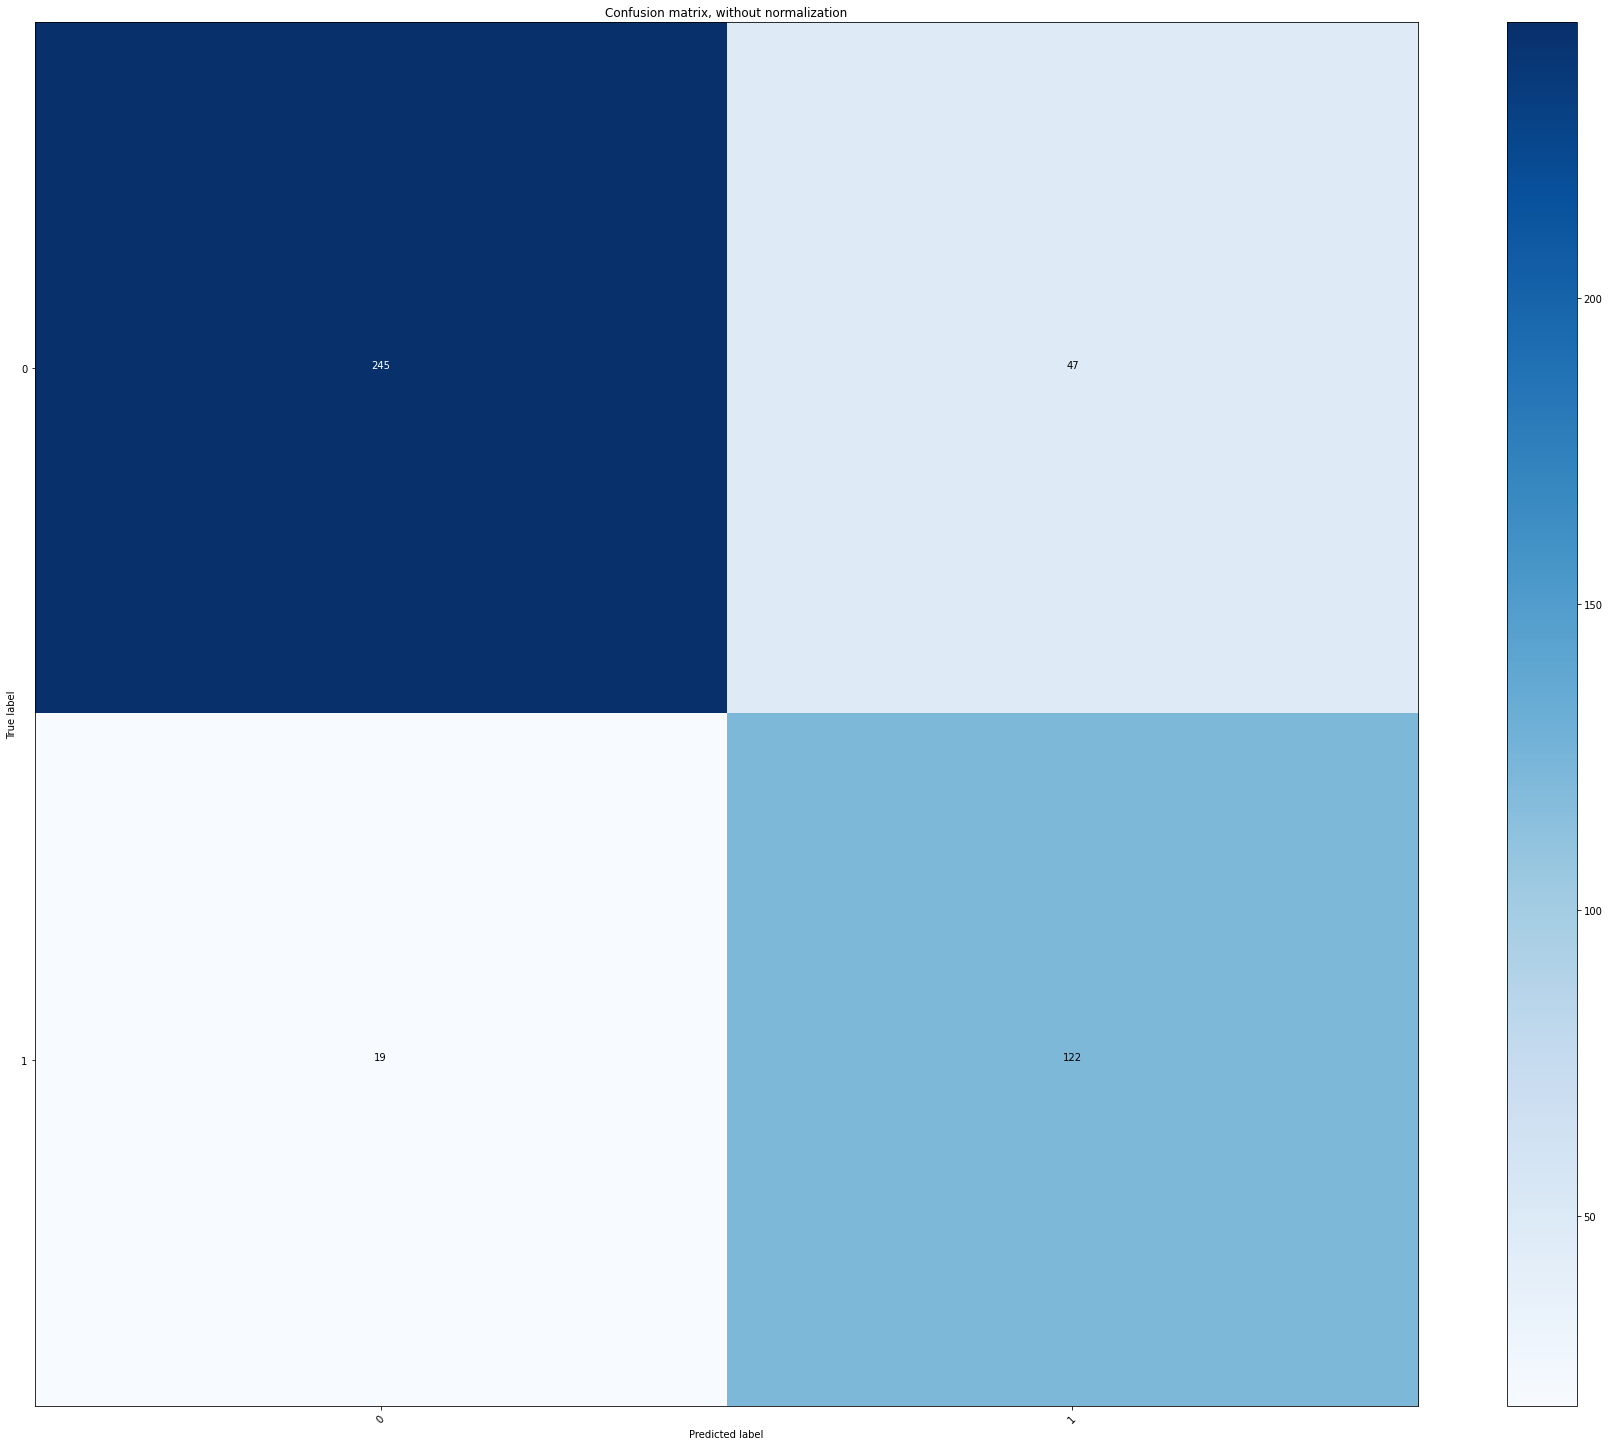

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_temp,
                      title='Confusion matrix, without normalization')
plt.show()

In [ ]:
# Calculate the elements of the confusion matrix
TNLogistic = prediction.filter('prediction = 0 AND label = prediction').count()
TPLogistic = prediction.filter('prediction = 1 AND label = prediction').count()
FNLogistic = prediction.filter('prediction = 0 AND label = 1').count()
FPLogistic = prediction.filter('prediction = 1 AND label = 0').count()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

accuracyLogistic = (TNLogistic + TPLogistic) / (TNLogistic + TPLogistic + FNLogistic + FPLogistic)
print("Accuracy:",accuracy)



# Calculate precision and recall
precisionLogistic = TPLogistic / (TPLogistic + FPLogistic)
recallLogistic = TPLogistic / (TPLogistic + FNLogistic)
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator()
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator()
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

Accuracy: 0.8452655889145496
precision = 0.72
recall   = 0.87
